# Chapter 3 TensorFlow Probability 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf

import tensorflow_probability as tfp

dist = tfp.distributions

import time

from PIL import Image

import glob

# Load data

In [109]:
image_paths = glob.glob("./shrunken_baby_ds/*.png")
images_ = [np.array(Image.open(im)) for im in image_paths]

images_ = [np.expand_dims(image, -1) for image in images_] # add extra dimension to each image (126,126) --> (126,126,1)
images_ = np.array(images_) # convert list of images to single array [(126,126,1)] --> (836, 126, 126, 1)

print(images_[0].shape)

(126, 126, 1)


In [54]:
labels = pd.read_csv("./shrunken_baby_ds/shrunken_baby_labels.csv")

In [9]:
labels

,0
0,94
1,11
2,41
3,86
4,81
...,...
831,53
832,33
833,10
834,30


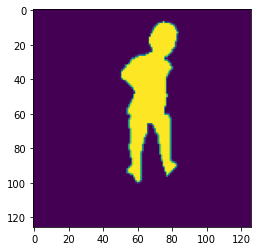

In [110]:
plt.imshow(np.squeeze(images_[0]))

# Build model

In [33]:
tf.keras.backend.clear_session()

kl_divergence_function = lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(836, dtype=tf.float32)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(126,126,1),name="basket"),
    
    tfp.layers.Convolution2DFlipout(16, kernel_size=5, strides=(1,1), data_format="channels_last", 
                                    padding="same", activation=tf.nn.relu, name="conv_tfp_1a", 
                                    kernel_divergence_fn=kl_divergence_function),
    tf.keras.layers.MaxPool2D(strides=(4,4), pool_size=(4,4), padding="same"),
    
    tfp.layers.Convolution2DFlipout(32, kernel_size=3, strides=(1,1), data_format="channels_last", 
                                    padding="same", activation=tf.nn.relu, name="conv_tfp_1b", 
                                    kernel_divergence_fn=kl_divergence_function),
    tf.keras.layers.MaxPool2D(strides=(4,4), pool_size=(4,4), padding="same"),

    tf.keras.layers.Flatten(),
    tfp.layers.DenseFlipout(1, kernel_divergence_fn=kl_divergence_function),
])

learning_rate = 1.0e-3

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate),
              metrics=['mse'])

# Train

In [31]:
batch_size = 5
history = model.fit(x=images_, 
                    y=np.array(labels),
                    epochs=250, 
                    verbose=1, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    validation_freq=5)

Epoch 1/250
151/151 [==============================] - 1s 4ms/step - loss: 6465.9263 - mse: 6444.5703
Epoch 2/250
151/151 [==============================] - 0s 3ms/step - loss: 1484.2294 - mse: 1462.8910
Epoch 3/250
151/151 [==============================] - 0s 3ms/step - loss: 792.5889 - mse: 771.2654
Epoch 4/250
151/151 [==============================] - 0s 3ms/step - loss: 562.1837 - mse: 540.8776
Epoch 5/250
151/151 [==============================] - 1s 6ms/step - loss: 449.5913 - mse: 428.3039 - val_loss: 395.3693 - val_mse: 374.0914
Epoch 6/250
151/151 [==============================] - 0s 3ms/step - loss: 343.5684 - mse: 322.3005
Epoch 7/250
151/151 [==============================] - 0s 3ms/step - loss: 276.3658 - mse: 255.1188
Epoch 8/250
151/151 [==============================] - 0s 3ms/step - loss: 271.4189 - mse: 250.1924
Epoch 9/250
151/151 [==============================] - 0s 3ms/step - loss: 240.7611 - mse: 219.5557
Epoch 10/250
151/151 [==============================] -

In [34]:
batch_size = 50
history = model.fit(x=images_, 
                    y=np.array(labels),
                    epochs=250, 
                    verbose=1, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    validation_freq=5)

Epoch 1/250
16/16 [==============================] - 0s 17ms/step - loss: 21993.1406 - mse: 21971.7891
Epoch 2/250
16/16 [==============================] - 0s 12ms/step - loss: 8819.0430 - mse: 8797.6875
Epoch 3/250
16/16 [==============================] - 0s 12ms/step - loss: 5173.7119 - mse: 5152.3579
Epoch 4/250
16/16 [==============================] - 0s 12ms/step - loss: 4094.4900 - mse: 4073.1370
Epoch 5/250
16/16 [==============================] - 1s 32ms/step - loss: 3186.0017 - mse: 3164.6497 - val_loss: 2990.5220 - val_mse: 2969.1704
Epoch 6/250
16/16 [==============================] - 0s 12ms/step - loss: 2541.4180 - mse: 2520.0664
Epoch 7/250
16/16 [==============================] - 0s 12ms/step - loss: 2090.5872 - mse: 2069.2378
Epoch 8/250
16/16 [==============================] - 0s 12ms/step - loss: 2319.9614 - mse: 2298.6133
Epoch 9/250
16/16 [==============================] - 0s 12ms/step - loss: 1518.2520 - mse: 1496.9056
Epoch 10/250
16/16 [==========================

In [33]:
history = model.fit(x=images_, 
                    y=np.array(   labels),
                    epochs=50, 
                    verbose=1, 
                    batch_size=10,
                    use_multiprocessing=False,
                    validation_split=0.1,
                    validation_freq=5)

Epoch 1/50
76/76 [==============================] - 0s 5ms/step - loss: 1166.2853 - mse: 1144.9467
Epoch 2/50
76/76 [==============================] - 0s 4ms/step - loss: 54.2878 - mse: 32.9867
Epoch 3/50
76/76 [==============================] - 0s 4ms/step - loss: 50.0441 - mse: 28.7832
Epoch 4/50
76/76 [==============================] - 0s 4ms/step - loss: 46.4094 - mse: 25.1916
Epoch 5/50
76/76 [==============================] - 1s 9ms/step - loss: 43.1539 - mse: 21.9826 - val_loss: 56.5044 - val_mse: 35.3573
Epoch 6/50
76/76 [==============================] - 0s 4ms/step - loss: 43.0855 - mse: 21.9601
Epoch 7/50
76/76 [==============================] - 0s 4ms/step - loss: 41.5392 - mse: 20.4580
Epoch 8/50
76/76 [==============================] - 0s 4ms/step - loss: 42.1570 - mse: 21.1203
Epoch 9/50
76/76 [==============================] - 0s 4ms/step - loss: 41.2312 - mse: 20.2374
Epoch 10/50
76/76 [==============================] - 0s 5ms/step - loss: 41.3131 - mse: 20.3613 - val_

# Predict test example and spider

In [42]:
model.predict(images_[0:2]) # example out for predictions

array([[51.94363],
       [33.71014]], dtype=float32)

In [100]:
spider = np.array(Image.open("test_spider.png"), dtype=np.int)
spider = spider // 255 # normalise to same range as the baby images

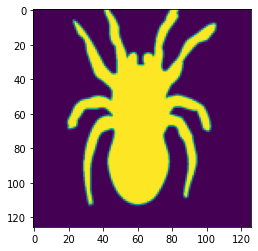

In [103]:
plt.imshow(spider)

In [89]:
spider_predictions = [model.predict(np.expand_dims(spider, [0,-1]))[0,0] for i in range(1000)]

In [93]:
baby_predictions = [model.predict(np.expand_dims(test_image, [0]))[0,0] for i in range(1000)]

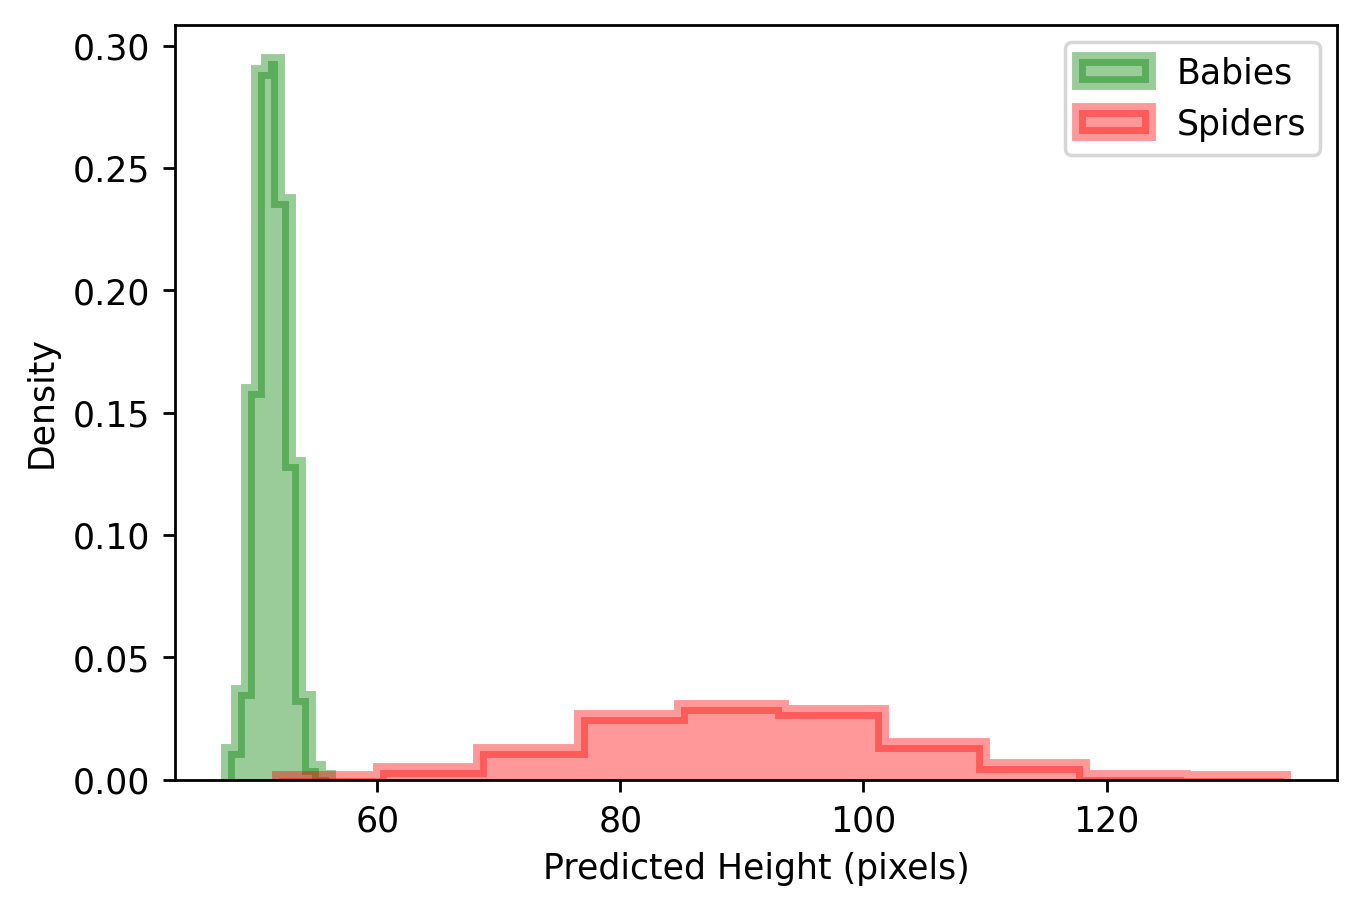

In [107]:
plt.hist(baby_predictions, color='g', alpha=0.4, histtype='step', label='Babies', fill=True, linewidth=4, density=True)
plt.hist(spider_predictions, color='r', alpha=0.4, histtype='step', label='Spiders', fill=True, linewidth=4, density=True)

plt.xlabel('Predicted Height (pixels)')
plt.ylabel("Density")
plt.legend()

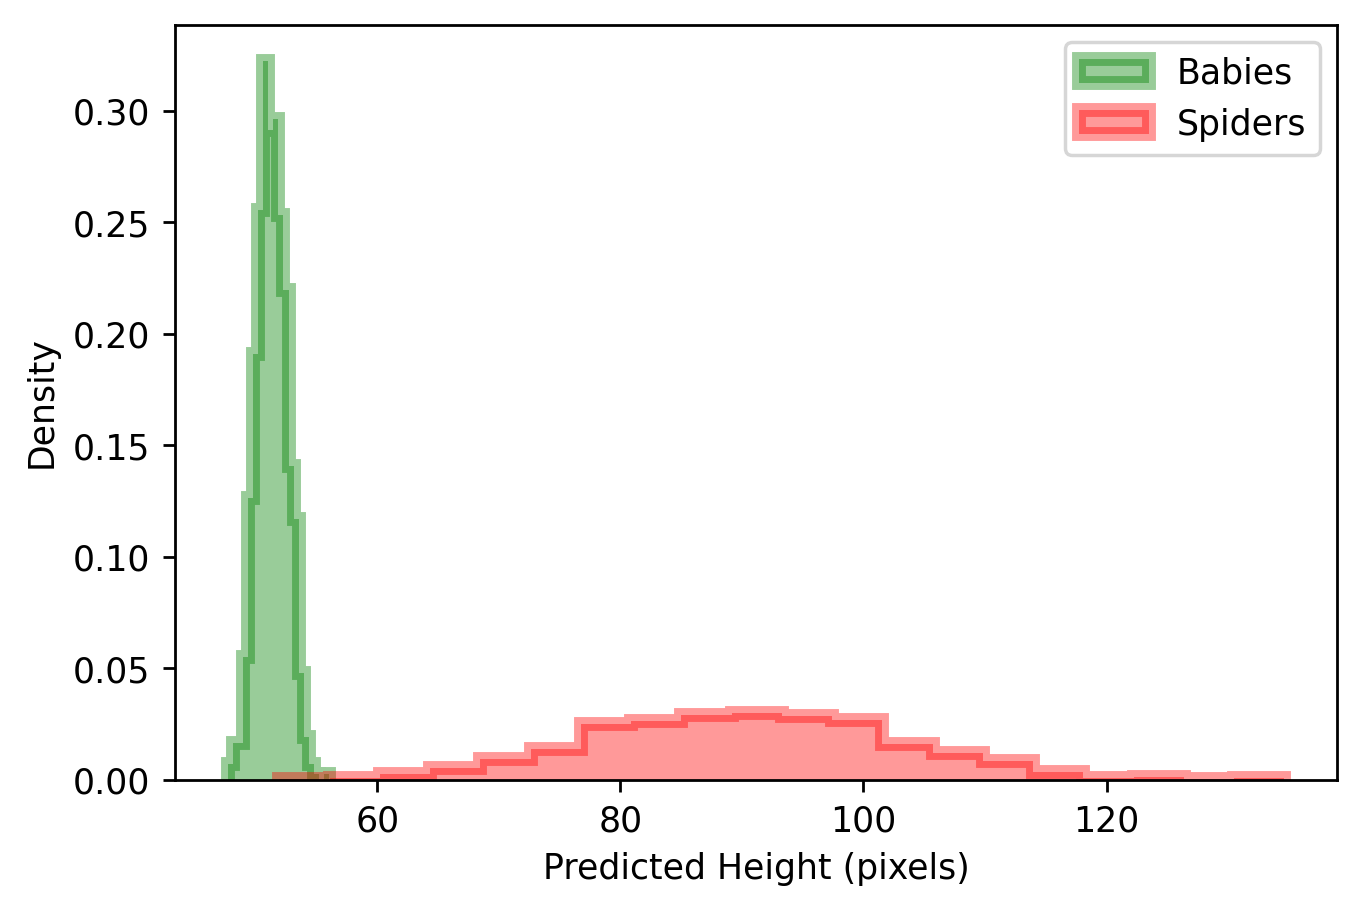

In [106]:
plt.hist(baby_predictions, color='g', alpha=0.4, histtype='step', label='Babies', fill=True, linewidth=4, bins=20, density=True)
plt.hist(spider_predictions, color='r', alpha=0.4, histtype='step', label='Spiders', fill=True, linewidth=4,bins=20,density=True)

plt.xlabel('Predicted Height (pixels)')
plt.ylabel("Density")
plt.legend()

In [108]:
print(np.mean(spider_predictions))
print(np.std(spider_predictions))

90.36386
12.6569605


In [110]:
print(max(spider_predictions))

134.63466


In [111]:
print(min(spider_predictions))

51.93123


In [109]:
print(np.mean(baby_predictions))
print(np.std(baby_predictions))

51.343
1.2088971
